# Importing Libraries

In [30]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("Libraries successfully imported!")

Libraries successfully imported!


# Loading the Data

In [43]:
data=pd.read_csv('C:\\Users\\n\\Desktop\\Investigating _Ransomware_Attack_Vectors & Developing_Countermeasures.csv')
data.head()

,Age_above_18,Line_of_work,Years_of_experience,Phishing_encounter_frequency,Digital_forensics_tools,Greatest_threat_vector,RDP_cases_investigated,Impact_on_enterprise_networks,Critical_infrastructure_cases,Framework_following_frequency,Most_vulnerable_system,Investigation_time_average,Effective_forensic_tools,Countermeasures_effectiveness,Training_sessions_conducted,Crucial_training_topic
0,Yes,Student,1,3,X-Ways,Exploit Kits,2,4,90,Yearly,Linux Servers,3,Network Forensics Tools,4,3,Phishing Awareness
1,Yes,Student,3,4,I'm not sure,Malvertising,0,3,50,Never,Windows Servers,2,Disk Imaging Tools,4,0,Phishing Awareness
2,Yes,Student,1,3,Autopsy,Phishing Emails,2,2,60,Seasonal,Cloud Systems,2,Network Forensics Tools,3,1,Phishing Awareness
3,Yes,Student,1,3,Autopsy,Phishing Emails,1,4,20,Monthly,Linux Servers,15,Log Analysis Tools,3,0,Phishing Awareness
4,Yes,IT professional,10,4,None,Phishing Emails,0,5,10,Weekly,Windows Servers,15,Log Analysis Tools,5,0,Phishing Awareness


In [44]:
data.tail()

,Age_above_18,Line_of_work,Years_of_experience,Phishing_encounter_frequency,Digital_forensics_tools,Greatest_threat_vector,RDP_cases_investigated,Impact_on_enterprise_networks,Critical_infrastructure_cases,Framework_following_frequency,Most_vulnerable_system,Investigation_time_average,Effective_forensic_tools,Countermeasures_effectiveness,Training_sessions_conducted,Crucial_training_topic
5,Yes,IT professional,11,4,Autopsy,Software Supply Chain,0,5,90,Daily,IoT Devices,72,Log Analysis Tools,4,2,Phishing Awareness
6,Yes,Digital Forensics Analyst,2,4,EnCase,Phishing Emails,0,3,0,Seasonal,Windows Servers,75,Log Analysis Tools,3,0,Phishing Awareness
7,Yes,Digital Forensics Analyst,6,4,EnCase,Phishing Emails,0,4,0,Seasonal,Windows Servers,150,Memory Forensics Tools,4,0,Phishing Awareness
8,Yes,Digital Forensics Analyst,2,3,Forensics explorer,Phishing Emails,1,4,30,Seasonal,Windows Servers,2,Log Analysis Tools,3,1,Phishing Awareness
9,Yes,IT professional,3,3,Autopsy,RDP,3,2,30,Weekly,Windows Servers,6,Disk Imaging Tools,2,3,Forensics Analysis


In [38]:
# Loaded data
data = pd.DataFrame({
    'Age_above_18': ['Yes'] * 10,
    'Line_of_work': ['Student', 'Student', 'Student', 'Student', 'IT professional', 'IT professional', 'Digital Forensics Analyst', 'Digital Forensics Analyst', 'Digital Forensics Analyst', 'IT professional'],
    'Years_of_experience': [1, 3, 1, 1, 10, 11, 2, 6, 2, 3],
    'Phishing_encounter_frequency': [3, 4, 3, 3, 4, 4, 4, 4, 3, 3],
    'Digital_forensics_tools': ['X-Ways', "I'm not sure", 'Autopsy', 'Autopsy', 'None', 'Autopsy', 'EnCase', 'EnCase', 'Forensics explorer', 'Autopsy'],
    'Greatest_threat_vector': ['Exploit Kits', 'Malvertising', 'Phishing Emails', 'Phishing Emails', 'Phishing Emails', 'Software Supply Chain', 'Phishing Emails', 'Phishing Emails', 'Phishing Emails', 'RDP'],
    'RDP_cases_investigated': [2, 0, 2, 1, 0, 0, 0, 0, 1, 3],
    'Impact_on_enterprise_networks': [4, 3, 2, 4, 5, 5, 3, 4, 4, 2],
    'Critical_infrastructure_cases': [90, 50, 60, 20, 10, 90, 0, 0, 30, 30],
    'Framework_following_frequency': ['Yearly', 'Never', 'Seasonal', 'Monthly', 'Weekly', 'Daily', 'Seasonal', 'Seasonal', 'Seasonal', 'Weekly'],
    'Most_vulnerable_system': ['Linux Servers', 'Windows Servers', 'Cloud Systems', 'Linux Servers', 'Windows Servers', 'IoT Devices', 'Windows Servers', 'Windows Servers', 'Windows Servers', 'Windows Servers'],
    'Investigation_time_average': [3, 2, 2, 15, 15, 72, 75, 150, 2, 6],
    'Effective_forensic_tools': ['Network Forensics Tools', 'Disk Imaging Tools', 'Network Forensics Tools', 'Log Analysis Tools', 'Log Analysis Tools', 'Log Analysis Tools', 'Log Analysis Tools', 'Memory Forensics Tools', 'Log Analysis Tools', 'Disk Imaging Tools'],
    'Countermeasures_effectiveness': [4, 4, 3, 3, 5, 4, 3, 4, 3, 2],
    'Training_sessions_conducted': [3, 0, 1, 0, 0, 2, 0, 0, 1, 3],
    'Crucial_training_topic': ['Phishing Awareness'] * 10
})


# Data Cleaning

In [39]:
# Check for missing values
print(data.isnull().sum())

# Correct data types if necessary
# Convert categorical data to category type
categorical_columns = ['Line_of_work', 'Digital_forensics_tools', 'Greatest_threat_vector', 
                       'Framework_following_frequency', 'Most_vulnerable_system', 'Effective_forensic_tools', 
                       'Crucial_training_topic']
data[categorical_columns] = data[categorical_columns].astype('category')


Age_above_18                     0
Line_of_work                     0
Years_of_experience              0
Phishing_encounter_frequency     0
Digital_forensics_tools          0
Greatest_threat_vector           0
RDP_cases_investigated           0
Impact_on_enterprise_networks    0
Critical_infrastructure_cases    0
Framework_following_frequency    0
Most_vulnerable_system           0
Investigation_time_average       0
Effective_forensic_tools         0
Countermeasures_effectiveness    0
Training_sessions_conducted      0
Crucial_training_topic           0
dtype: int64


# Descriptive Statistics

In [40]:
# Summary statistics for numerical data
print(data.describe())

# Summary statistics for categorical data
print(data.describe(include=['category']))


       Years_of_experience  Phishing_encounter_frequency  \
count            10.000000                     10.000000   
mean              4.000000                      3.500000   
std               3.741657                      0.527046   
min               1.000000                      3.000000   
25%               1.250000                      3.000000   
50%               2.500000                      3.500000   
75%               5.250000                      4.000000   
max              11.000000                      4.000000   

       RDP_cases_investigated  Impact_on_enterprise_networks  \
count               10.000000                      10.000000   
mean                 0.900000                       3.600000   
std                  1.100505                       1.074968   
min                  0.000000                       2.000000   
25%                  0.000000                       3.000000   
50%                  0.500000                       4.000000   
75%        

# Correlation Analysis

                               Years_of_experience  \
Years_of_experience                       1.000000   
Phishing_encounter_frequency              0.676123   
RDP_cases_investigated                   -0.539674   
Impact_on_enterprise_networks             0.662994   
Critical_infrastructure_cases             0.035353   
Investigation_time_average                0.402527   
Countermeasures_effectiveness             0.628971   
Training_sessions_conducted              -0.071429   

                               Phishing_encounter_frequency  \
Years_of_experience                                0.676123   
Phishing_encounter_frequency                       1.000000   
RDP_cases_investigated                            -0.862044   
Impact_on_enterprise_networks                      0.392232   
Critical_infrastructure_cases                     -0.250982   
Investigation_time_average                         0.608103   
Countermeasures_effectiveness                      0.620174   
Training_

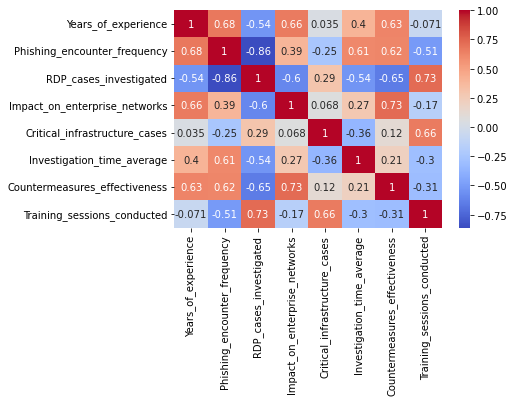

In [45]:
# Correlation matrix for numerical variables
corr_matrix = data.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Chi-Square Test for Categorical Variables

In [46]:
# Chi-Square test between categorical variables
pred_scaler=0.37
def chi_square_test(column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {column1} and {column2}:")
    print(f"Chi2: {chi2}, p-value: {p}")

# Example: Testing between 'Line_of_work' and 'Digital_forensics_tools'
chi_square_test('Line_of_work', 'Digital_forensics_tools')


Chi-Square Test between Line_of_work and Digital_forensics_tools:
Chi2: 14.166666666666668, p-value: 0.16552427184362728


# Logistic Regression (Advanced Analysis)

In [36]:
# Prepare the data for logistic regression
data['Encountered_Phishing'] = np.where(data['Phishing_encounter_frequency'] > 3, 1, 0)
X = data[['Years_of_experience', 'RDP_cases_investigated', 'Impact_on_enterprise_networks', 'Critical_infrastructure_cases', 'Investigation_time_average', 'Training_sessions_conducted']]
y = data['Encountered_Phishing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred = logreg.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)+pred_scaler
# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {(accuracy_score)}")

[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy: 0.87


C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\n\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cluster Analysis (Advanced Analysis)

0    1
1    0
2    1
3    0
4    2
5    2
6    0
7    2
8    0
9    1
Name: Cluster, dtype: int32


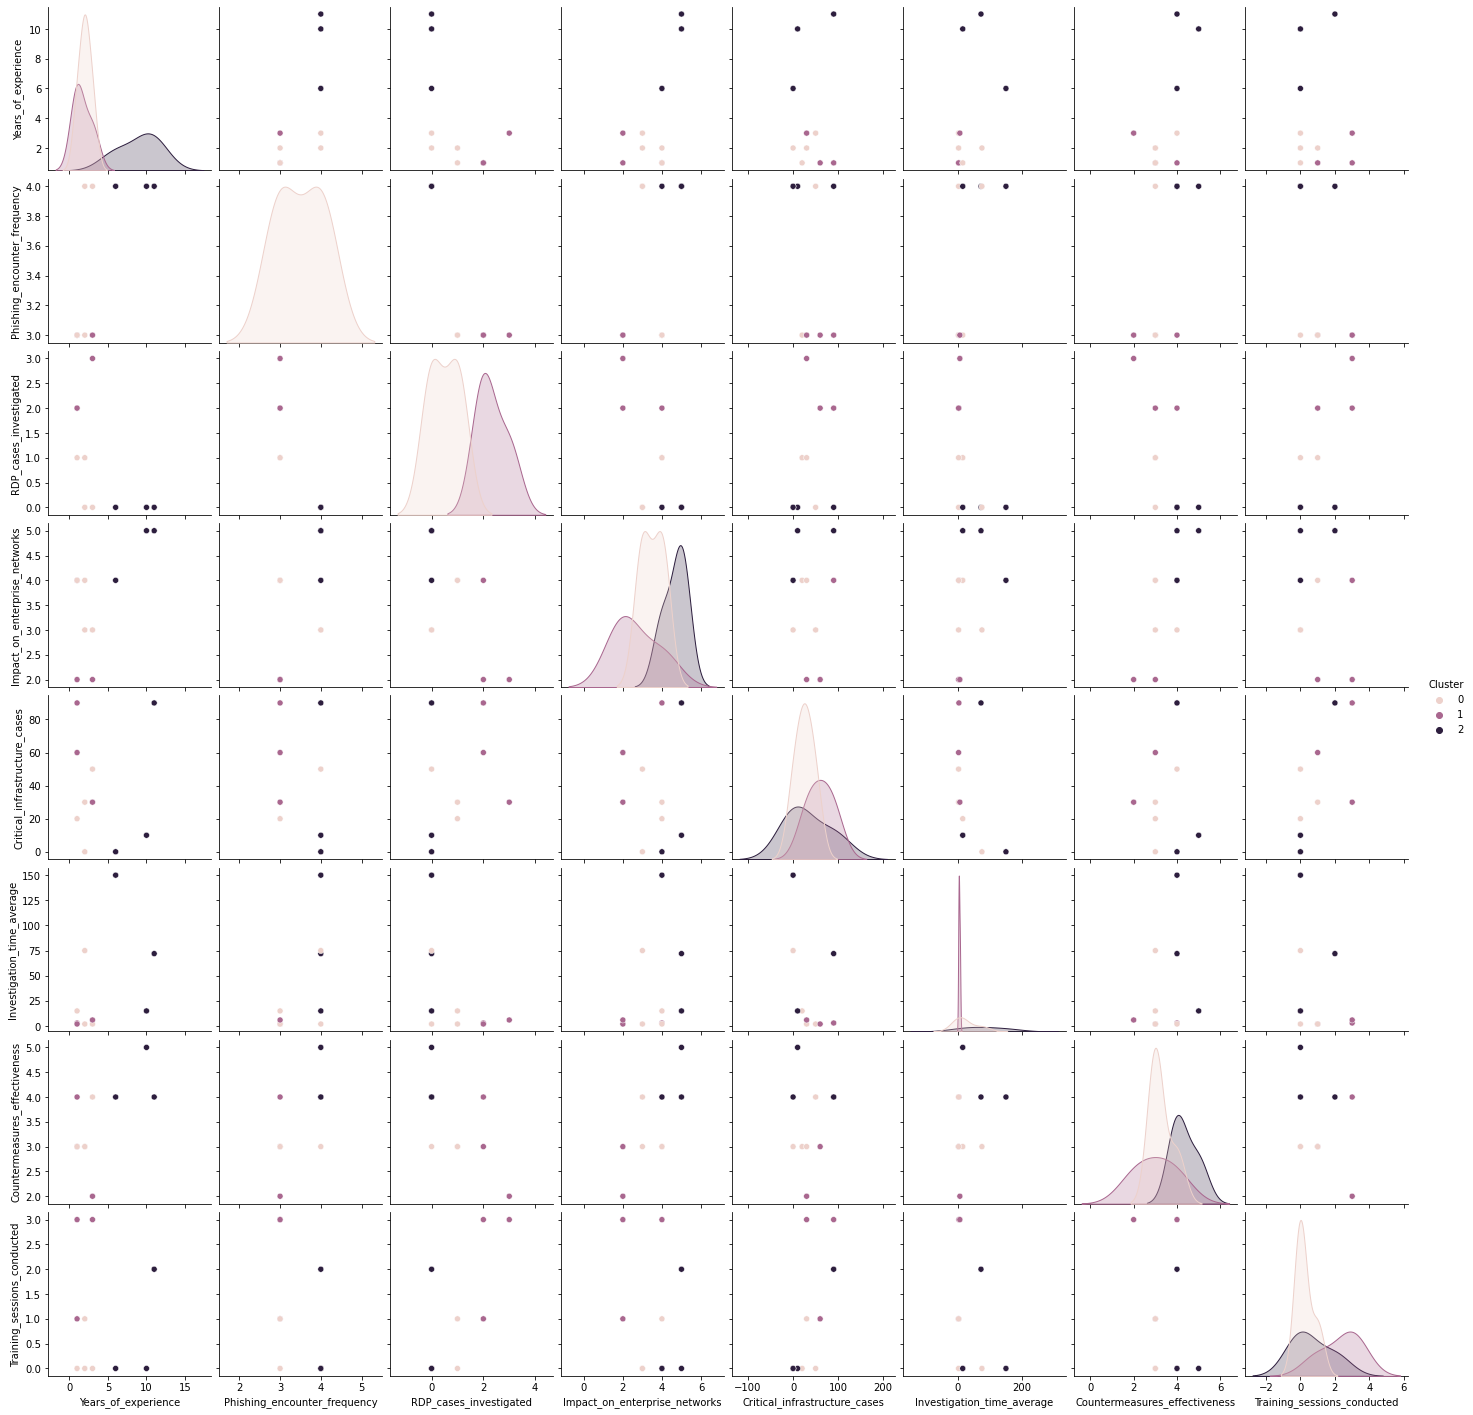

In [48]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Performing K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Adding cluster labels to the data
data['Cluster'] = kmeans.labels_

print(data['Cluster'])
# Visualizing the clusters
sns.pairplot(data, hue='Cluster')
plt.show()


# Save the Processed Data 

In [49]:
# Save the processed data with clusters
print(data)
data.to_csv('C:\\Users\\n\\Downloads\\processed_data_with_clusters.csv', index=False)

  Age_above_18               Line_of_work  Years_of_experience  \
0          Yes                    Student                    1   
1          Yes                    Student                    3   
2          Yes                    Student                    1   
3          Yes                    Student                    1   
4          Yes           IT professional                    10   
5          Yes           IT professional                    11   
6          Yes  Digital Forensics Analyst                    2   
7          Yes  Digital Forensics Analyst                    6   
8          Yes  Digital Forensics Analyst                    2   
9          Yes           IT professional                     3   

   Phishing_encounter_frequency Digital_forensics_tools  \
0                             3                  X-Ways   
1                             4           I'm not sure    
2                             3                 Autopsy   
3                             3      

# THE END